In [28]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns

In [490]:
def load_data(file_path, index_name):
    data = pd.read_csv(file_path, engine='python', encoding='utf-8')
    return data.set_index(index_name) if len(index_name) > 0 else data

def print_dataset_info(dataset, key_name):
    print('1. %s rows of data, %s columns' % (dataset.shape[0], dataset.shape[1]) )
    print('2. Columns are: %s' % dataset.columns)
    print('3. %s unique %s in the data.' % (dataset[key_name].nunique(), key_name))
    print('4. Is any missing data?')
    print(dataset.isnull().any())

### 1. Load Dataset

In [489]:
data_listings = load_data('dataset/listings.csv', '')
data_reviews = load_data('dataset/reviews.csv', '')
data_calendar_202006 = load_data('dataset/calendar.csv', '')
data_calendar_201906 = load_data('dataset/calendar_2019.csv', '')
data_calendar_202001 = load_data('dataset/calendar_202001.csv', '')
data_calendar_201901 = load_data('dataset/calendar_201901.csv', '')

### 2. Explore Dataset

In [491]:
# data_listings
print_dataset_info(data_listings, 'id')
data_listings.head(2)

1. 8103 rows of data, 106 columns
2. Columns are: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
3. 8103 unique id in the data.
4. Is any missing data?
id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
name                                             True
                                             

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20200629042806,2020-06-30,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,"私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...","你的套房裡有清爽安靜的空間,舒服的衛浴設備,無線網路Wi-fi,旅行需要洗衣服也沒問題,有洗...","私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",none,This area is what we called Business & Residen...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.47
1,74643,https://www.airbnb.com/rooms/74643,20200629042806,2020-06-30,小巨蛋｡南京復興站溫馨套房,"小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...","歡迎來台北,我們的小提琴工作室就在一旁,如果有興趣,我們很樂意和客人互動! 你的套房裡有清爽...","小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...",none,"微風南京,台北小巨蛋｡ 南京復興捷運站,兄弟飯店,文華飯店｡",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.46


In [492]:
# data_reviews
print_dataset_info(data_reviews, 'listing_id')
data_reviews.head()

1. 270244 rows of data, 6 columns
2. Columns are: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
3. 6308 unique listing_id in the data.
4. Is any missing data?
listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,74641,730893,2011-11-20,933072,Yixi,3036 is a great find. The place is newly renov...
1,74641,1145534,2012-04-17,2066091,Ryota,"Good location, Number lock (24h doorway), Face..."
2,74641,3643432,2013-02-26,438952,Roy,"As described, good location, clean and comfort..."
3,74641,3810853,2013-03-17,5370009,Herman,My girlfriend and I spent 5 nights here and it...
4,74641,4226835,2013-04-20,1989618,Morgan,"Our stay in Taipei was amazing, in large part ..."


In [493]:
# data_calendar
print_dataset_info(data_calendar_202006, 'listing_id')
print('-----')
print_dataset_info(data_calendar_201906, 'listing_id')
print('-----')
print_dataset_info(data_calendar_202001, 'listing_id')
print('-----')
print_dataset_info(data_calendar_201901, 'listing_id')

1. 2958120 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
3. 8103 unique listing_id in the data.
4. Is any missing data?
listing_id        False
date              False
available         False
price              True
adjusted_price     True
minimum_nights     True
maximum_nights     True
dtype: bool
-----
1. 3674528 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
3. 10067 unique listing_id in the data.
4. Is any missing data?
listing_id        False
date              False
available         False
price             False
adjusted_price    False
minimum_nights     True
maximum_nights     True
dtype: bool
-----
1. 3786510 rows of data, 7 columns
2. Columns are: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'm

### 3. Create Function of Data Cleaning and Transformation

In [513]:
def data_drop_na(dataset, column_name):
    dataset[dataset[column_name].notna()]
    print('Number of Rows in The Original Dataframe:', len(dataset))
    print('Number of Rows After Droping NA', len(dataset[dataset[column_name].notna()]))
    return dataset[dataset[column_name].notna()]

def data_drop_duplicated(dataset):
    print('Number of Rows in The Original Dataframe:', len(dataset))
    print('Number of Rows After Droping DUPLICATED', len(dataset.drop_duplicates()))
    return dataset.drop_duplicates()

In [525]:
def transCalendar(dataset):
    dataset = data_drop_na(dataset, 'price')
    dataset = data_drop_duplicated(dataset)
    
    dataset['booked'] = dataset.available.map(lambda x: 1 if x == 'f' else 0)
    dataset.date = pd.to_datetime(dataset.date)
    dataset['price'] = dataset.price.str.replace('$', '').str.replace(',', '').astype(float)
    
    grouped_total_booked = dataset.groupby('date')['booked'].sum().reset_index().sort_values(by=['date'])
    grouped_total_listings = dataset.groupby('date')['listing_id'].count().reset_index().sort_values(by=['date'])
    grouped_avg_price = dataset.groupby('date')['price'].mean().reset_index().sort_values(by=['date'])
    
    return pd.DataFrame(data = {
        'date': grouped_total_listings.date,
        'year': grouped_total_listings.date.dt.year,
        'month': grouped_total_listings.date.dt.month,
        'order': grouped_total_listings.date.dt.year*100 + grouped_total_listings.date.dt.month,
        'day_of_week': grouped_total_listings.date.dt.day_name(),
        'total_booked': grouped_total_booked.booked,
        'total_listings': grouped_total_listings.listing_id,
        'occupancy_rate': (grouped_total_booked.booked/grouped_total_listings.listing_id).apply(
            lambda x: round(x*100, 2)),
        'avg_price': grouped_avg_price.price
    })

def transReviews(dataset):
    dataset = data_drop_duplicated(dataset)
    
    dataset.date = pd.to_datetime(dataset.date)
    dataset['year'] = dataset.date.dt.year
    dataset['month'] = dataset.date.dt.month
    dataset['year_month'] = pd.to_datetime(dataset.date)

    grouped_reviews = dataset.groupby(dataset['year_month'].dt.to_period('M'))['listing_id'].count()
    grouped_reviews = grouped_reviews.resample('M').asfreq().fillna(0)

    return pd.DataFrame(data={'date': grouped_reviews.index.strftime('%Y-%m'), 
                              'year': grouped_reviews.index.year,
                              'month': grouped_reviews.index.month,
                              'reviews_count': grouped_reviews.values
                             })

## PART1: 分析疫情帶給Airbnb的影響 - 從租屋的市場需求與租金定價切入
### Q1: 對市場上租屋需求的影響
前題假設：reviews次數可代表booking次數，Airbnb官方稱有50%的房客會review
#### (1) 綜觀2011-2020/06 每月的review次數，趨勢的改變狀況？

In [528]:
reviews = transReviews(data_reviews)

Number of Rows in The Original Dataframe: 270244
Number of Rows After Droping DUPLICATED 270244


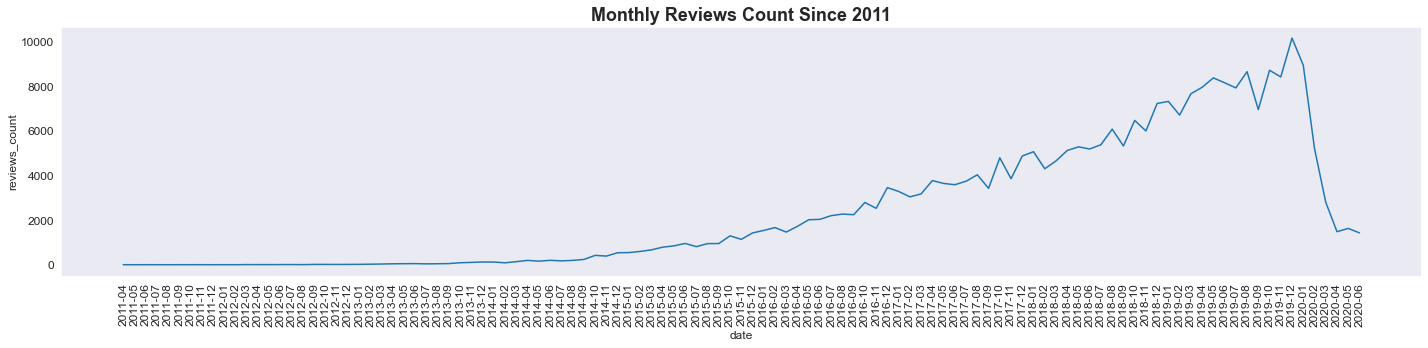

In [544]:
plt.figure(figsize=(20, 5))
sns.set_style('dark')

reviews_trend = sns.lineplot(data=reviews, x='date', y='reviews_count')
reviews_trend.set_title('Monthly Reviews Count Since 2011', fontsize=18, fontweight='bold')
plt.setp(reviews_trend.get_xticklabels(), rotation=90)
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.show()

#### (2) 一年中的需求變化狀況

<AxesSubplot:title={'center':'Total Demand by Months'}, xlabel='month', ylabel='reviews_count'>

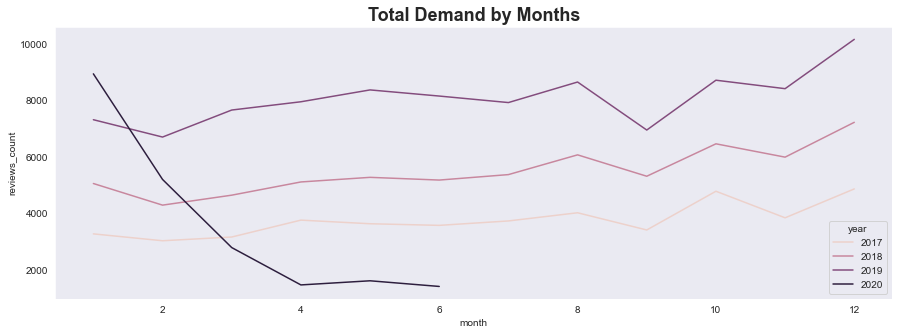

In [530]:
plt.figure(figsize=(15, 5))

plt.title('Total Demand by Months', fontsize=18, fontweight='bold');
sns.lineplot(data=reviews[reviews['year'].isin([2017, 2018, 2019, 2020])], 
             x='month', y='reviews_count', hue='year')

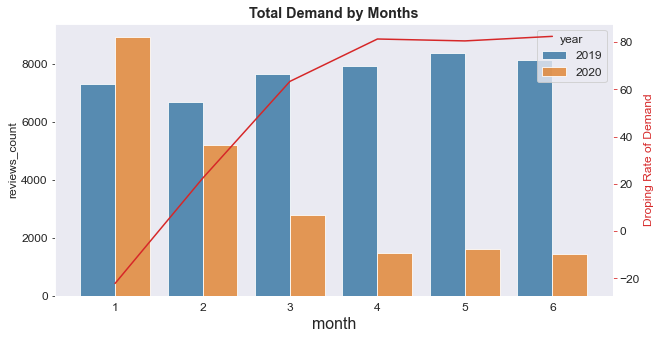

In [627]:
data = reviews[(reviews.year.isin([2019, 2020])) & (reviews.month.isin([1,2,3,4,5,6]))]

reviews_2020 = reviews[(reviews.year == 2020) & (reviews.month.isin([1,2,3,4,5,6]))].reset_index()
reviews_2019 = reviews[(reviews.year == 2019) & (reviews.month.isin([1,2,3,4,5,6]))].reset_index()
reviews_drop = pd.DataFrame({
    'month': reviews_2020.month-1,
    'droping_rate': round(((reviews_2019.reviews_count-reviews_2020.reviews_count)/reviews_2019.reviews_count)*100, 2)
})

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Total Demand by Months', fontweight='bold')
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(data = data, x='month', y='reviews_count', hue='year', alpha=0.8)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Droping Rate of Demand', color=color)
ax2 = sns.lineplot(x='month', y='droping_rate', data=reviews_drop, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

### Q2: 疫情對未來一年入住率的影響
#### 今年的入住率與往年相比掉了多少？

In [531]:
calendar_202006 = transCalendar(data_calendar_202006)
calendar_201906 = transCalendar(data_calendar_201906)
calendar_202001 = transCalendar(data_calendar_202001)
calendar_201901 = transCalendar(data_calendar_201901)

Number of Rows in The Original Dataframe: 2958120
Number of Rows After Droping NA 2957778
Number of Rows in The Original Dataframe: 2957778
Number of Rows After Droping DUPLICATED 2957778
Number of Rows in The Original Dataframe: 3674528
Number of Rows After Droping NA 3674528
Number of Rows in The Original Dataframe: 3674528
Number of Rows After Droping DUPLICATED 3674528
Number of Rows in The Original Dataframe: 3786510
Number of Rows After Droping NA 3786510
Number of Rows in The Original Dataframe: 3786510
Number of Rows After Droping DUPLICATED 3786510
Number of Rows in The Original Dataframe: 3456971
Number of Rows After Droping NA 3456971
Number of Rows in The Original Dataframe: 3456971
Number of Rows After Droping DUPLICATED 3456971


<AxesSubplot:title={'center':'Occypancy (Percent) by Months (Jan.)'}, xlabel='month', ylabel='occupancy_rate'>

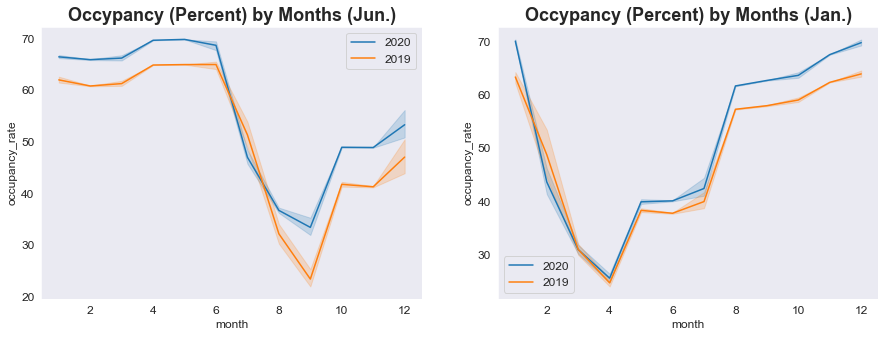

In [557]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Occypancy (Percent) by Months (Jun.)', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="occupancy_rate", data=calendar_202006, label='2020')
sns.lineplot(x="month", y="occupancy_rate", data=calendar_201906, label='2019')

plt.subplot(1, 2, 2)
plt.title('Occypancy (Percent) by Months (Jan.)', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="occupancy_rate", data=calendar_202001, label='2020')
sns.lineplot(x="month", y="occupancy_rate", data=calendar_201901, label='2019')

### Q3: 疫情對房東定價策略的影響
#### 今年與去年相比，租金是否訂定得比過往便宜？

<AxesSubplot:title={'center':'Average Price by Months (Jan.)'}, xlabel='month', ylabel='avg_price'>

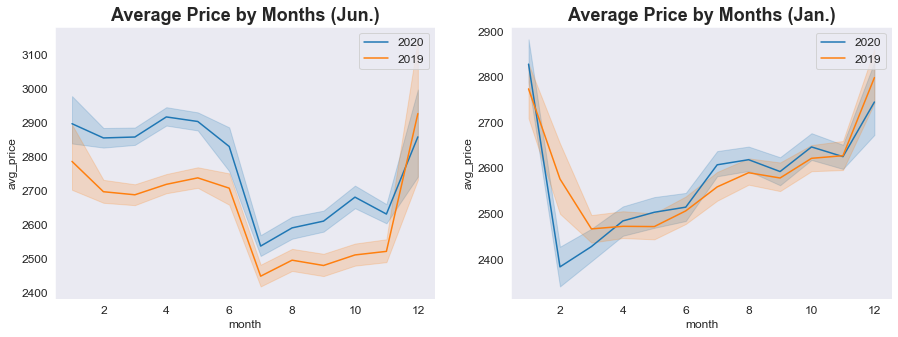

In [558]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Average Price by Months (Jun.)', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="avg_price", data=calendar_202006, label='2020')
sns.lineplot(x="month", y="avg_price", data=calendar_201906, label='2019')

plt.subplot(1, 2, 2)
plt.title('Average Price by Months (Jan.)', fontsize=18, fontweight='bold');
sns.lineplot(x="month", y="avg_price", data=calendar_202001, label='2020')
sns.lineplot(x="month", y="avg_price", data=calendar_201901, label='2019')

### 未來的發展走向

1. 房東對未來一年的房租定價策略上

## PART2: 租金預測模型